In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
exp9_measure_1_df = pd.read_csv('./csv/exp9_measure_01.csv', sep=',')

In [3]:
exp9_measure_1_df

,Timestamp,Relative_Time,PT-F03_2_1_V,PT-F01_2_2_V,PT-L03_2_3_V,reference_M_Pa
0,2025-06-30 08:08:49.272,200.406,0.865125,0.857375,0.853500,0.0
1,2025-06-30 08:08:49.304,200.437,0.865125,0.857375,0.853500,0.0
2,2025-06-30 08:08:49.304,200.437,0.865125,0.857375,0.853500,0.0
3,2025-06-30 08:08:49.304,200.437,0.865125,0.857375,0.853500,0.0
4,2025-06-30 08:08:49.304,200.437,0.865125,0.857375,0.853500,0.0
...,...,...,...,...,...,...
34589,2025-06-30 08:12:25.383,416.516,0.861500,0.855125,0.852125,0.0
34590,2025-06-30 08:12:25.383,416.516,0.861500,0.855125,0.852125,0.0
34591,2025-06-30 08:12:25.383,416.516,0.861500,0.855125,0.852125,0.0
34592,2025-06-30 08:12:25.384,416.517,0.861500,0.855125,0.852125,0.0


In [4]:
exp9_measure_1_df = exp9_measure_1_df.dropna()

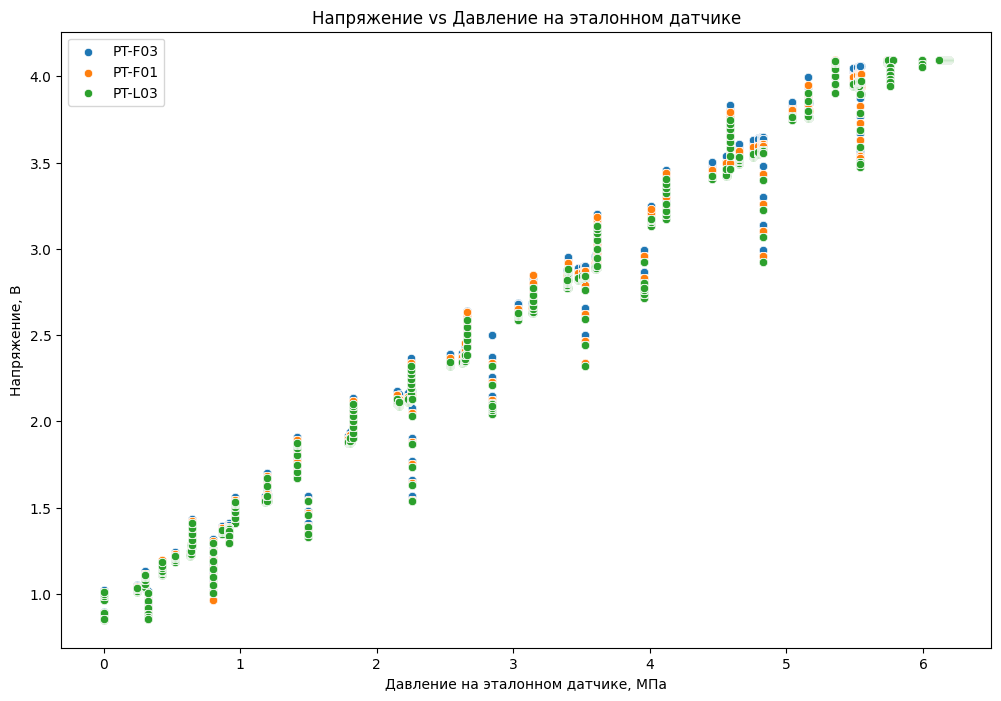

In [5]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=exp9_measure_1_df, x='reference_M_Pa', y='PT-F03_2_1_V', label='PT-F03')
sns.scatterplot(data=exp9_measure_1_df, x='reference_M_Pa', y='PT-F01_2_2_V', label='PT-F01')
sns.scatterplot(data=exp9_measure_1_df, x='reference_M_Pa', y='PT-L03_2_3_V', label='PT-L03')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Напряжение, В')
plt.title('Напряжение vs Давление на эталонном датчике')
plt.legend()
plt.savefig(f'./results/fig/exp_data.png')
plt.show()

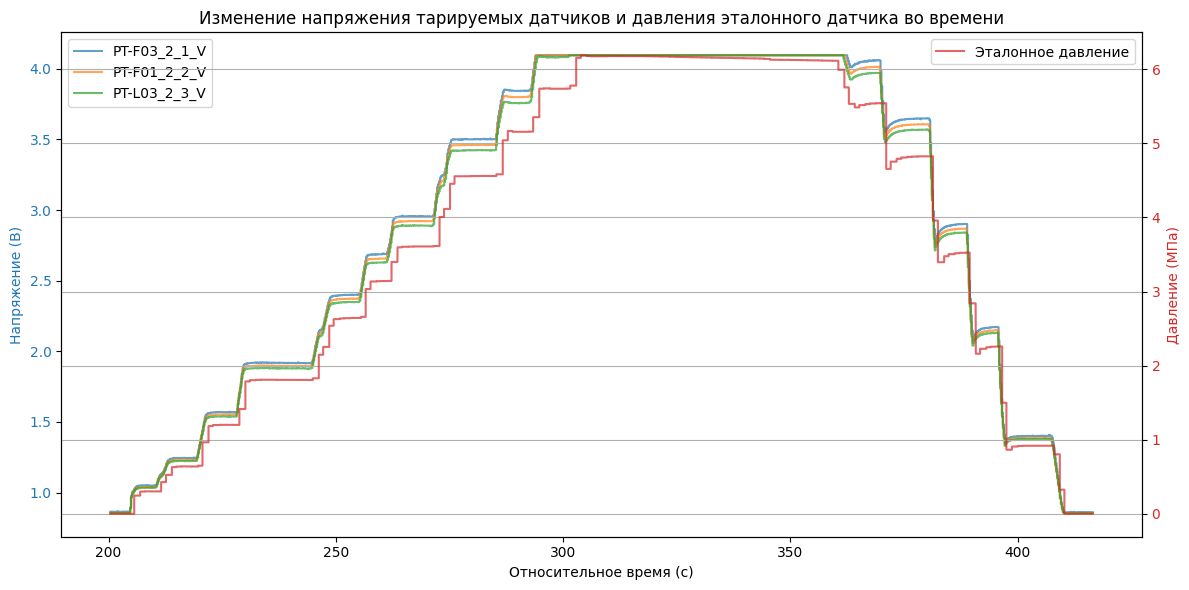

In [6]:
# Создание графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая шкала Y для тарируемых датчиков
ax1.set_xlabel('Относительное время (с)')
ax1.set_ylabel('Напряжение (В)', color='tab:blue')
ax1.plot(exp9_measure_1_df['Relative_Time'], exp9_measure_1_df['PT-F03_2_1_V'], label='PT-F03_2_1_V', color='tab:blue', alpha=0.7)
ax1.plot(exp9_measure_1_df['Relative_Time'], exp9_measure_1_df['PT-F01_2_2_V'], label='PT-F01_2_2_V', color='tab:orange', alpha=0.7)
ax1.plot(exp9_measure_1_df['Relative_Time'], exp9_measure_1_df['PT-L03_2_3_V'], label='PT-L03_2_3_V', color='tab:green', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Вторая шкала Y для эталонного датчика давления
ax2 = ax1.twinx()
ax2.set_ylabel('Давление (МПа)', color='tab:red')
ax2.plot(exp9_measure_1_df['Relative_Time'], exp9_measure_1_df['reference_M_Pa'], label='Эталонное давление', color='tab:red', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Настройка графика
plt.title('Изменение напряжения тарируемых датчиков и давления эталонного датчика во времени')
plt.grid()
plt.tight_layout()
plt.savefig(f'./results/fig/exp_data_time.png')
# Показ графика
plt.show()

In [7]:
# Находим моменты времени, когда значение эталонного датчика изменяется
reference_changes = exp9_measure_1_df['reference_M_Pa'].diff().abs() > 0

In [8]:
# Извлекаем времена обновления данных эталонного датчика
update_times = exp9_measure_1_df.loc[reference_changes, 'Relative_Time']

In [9]:
# Вычисляем разницу времени между обновлениями
update_intervals = update_times.diff().dropna()

In [10]:
# Находим минимальный интервал времени между обновлениями
min_update_interval = update_intervals.min()

In [11]:
print(f"Минимальный интервал времени между обновлениями данных эталонного датчика: {min_update_interval:.5f} секунд")

Минимальный интервал времени между обновлениями данных эталонного датчика: 0.89900 секунд


In [12]:
# Выбор данных с шагом, близким к минимальному интервалу обновления
selected_data = exp9_measure_1_df.iloc[::int(min_update_interval / (exp9_measure_1_df['Relative_Time'].diff().mean()))]


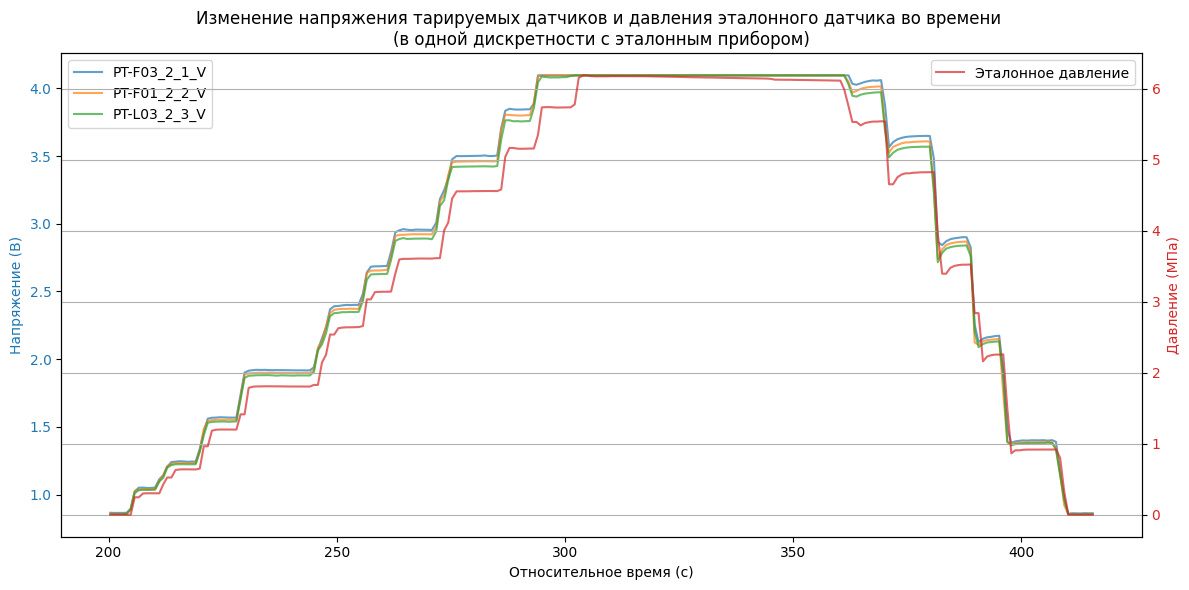

In [13]:
# Создание графика
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая шкала Y для тарируемых датчиков
ax1.set_xlabel('Относительное время (с)')
ax1.set_ylabel('Напряжение (В)', color='tab:blue')
ax1.plot(selected_data['Relative_Time'], selected_data['PT-F03_2_1_V'], label='PT-F03_2_1_V', color='tab:blue', alpha=0.7)
ax1.plot(selected_data['Relative_Time'], selected_data['PT-F01_2_2_V'], label='PT-F01_2_2_V', color='tab:orange', alpha=0.7)
ax1.plot(selected_data['Relative_Time'], selected_data['PT-L03_2_3_V'], label='PT-L03_2_3_V', color='tab:green', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')

# Вторая шкала Y для эталонного датчика давления
ax2 = ax1.twinx()
ax2.set_ylabel('Давление (МПа)', color='tab:red')
ax2.plot(selected_data['Relative_Time'], selected_data['reference_M_Pa'], label='Эталонное давление', color='tab:red', alpha=0.7)
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Настройка графика
plt.title('Изменение напряжения тарируемых датчиков и давления эталонного датчика во времени \n(в одной дискретности с эталонным прибором)')
plt.grid()
plt.tight_layout()
plt.savefig(f'./results/fig/exp_data_time_high_sampling.png')
# Показ графика
plt.show()


In [14]:
selected_data.to_excel('./results/selected_data.xlsx')

In [15]:
selected_data

,Timestamp,Relative_Time,PT-F03_2_1_V,PT-F01_2_2_V,PT-L03_2_3_V,reference_M_Pa
0,2025-06-30 08:08:49.272,200.406,0.865125,0.857375,0.853500,0.0
143,2025-06-30 08:08:50.161,201.294,0.863875,0.856500,0.851500,0.0
286,2025-06-30 08:08:51.019,202.152,0.864000,0.856375,0.853250,0.0
429,2025-06-30 08:08:51.948,203.081,0.864875,0.856500,0.852875,0.0
572,2025-06-30 08:08:52.823,203.957,0.864500,0.857000,0.857875,0.0
...,...,...,...,...,...,...
33891,2025-06-30 08:12:21.030,412.164,0.861000,0.854875,0.850500,0.0
34034,2025-06-30 08:12:21.943,413.076,0.860375,0.854250,0.852125,0.0
34177,2025-06-30 08:12:22.819,413.953,0.862375,0.853750,0.851375,0.0
34320,2025-06-30 08:12:23.735,414.869,0.861375,0.854125,0.852625,0.0


In [16]:
# Вычисление производной давления по времени
selected_data['reference_M_Pa_diff'] = selected_data['reference_M_Pa'].diff() / selected_data['Relative_Time'].diff()
selected_data['PT-F03_2_1_V_diff'] = selected_data['PT-F03_2_1_V'].diff() / selected_data['Relative_Time'].diff()
selected_data['PT-F01_2_2_V_diff'] = selected_data['PT-F01_2_2_V'].diff() / selected_data['Relative_Time'].diff()
selected_data['PT-L03_2_3_V_diff'] = selected_data['PT-L03_2_3_V'].diff() / selected_data['Relative_Time'].diff()

/tmp/ipykernel_340008/2727984860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['reference_M_Pa_diff'] = selected_data['reference_M_Pa'].diff() / selected_data['Relative_Time'].diff()
/tmp/ipykernel_340008/2727984860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['PT-F03_2_1_V_diff'] = selected_data['PT-F03_2_1_V'].diff() / selected_data['Relative_Time'].diff()
/tmp/ipykernel_340008/2727984860.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [17]:
# Установка порога для определения установившегося режима
stabilization_threshold = 0.01  # Задайте порог, например, 0.001 МПа/с

In [18]:
# Фильтрация данных: выбираем строки, где производная давления близка к нулю
stable_data = selected_data[
    (selected_data['reference_M_Pa_diff'].abs() < stabilization_threshold)&
    (selected_data['PT-F03_2_1_V_diff'].abs() < stabilization_threshold)&
    (selected_data['PT-F01_2_2_V_diff'].abs() < stabilization_threshold)&
    (selected_data['PT-L03_2_3_V_diff'].abs() < stabilization_threshold)
    
]

In [19]:
stable_data.to_excel('./results/stable_data.xlsx')

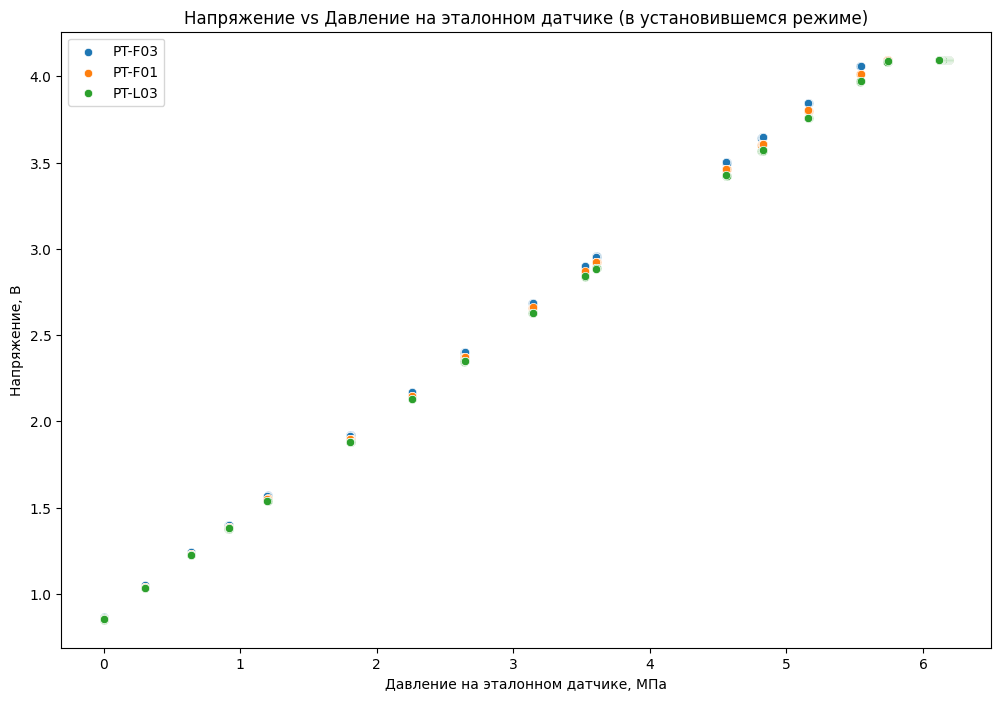

In [20]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stable_data, x='reference_M_Pa', y='PT-F03_2_1_V', label='PT-F03')
sns.scatterplot(data=stable_data, x='reference_M_Pa', y='PT-F01_2_2_V', label='PT-F01')
sns.scatterplot(data=stable_data, x='reference_M_Pa', y='PT-L03_2_3_V', label='PT-L03')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Напряжение, В')
plt.title('Напряжение vs Давление на эталонном датчике (в установившемся режиме)')
plt.legend()
plt.savefig(f'./results/fig/exp_data_stable_data.png')
plt.show()

In [21]:
# Удалим данные более 6 МПа
stable_data_filtered = stable_data[stable_data['reference_M_Pa']<6]

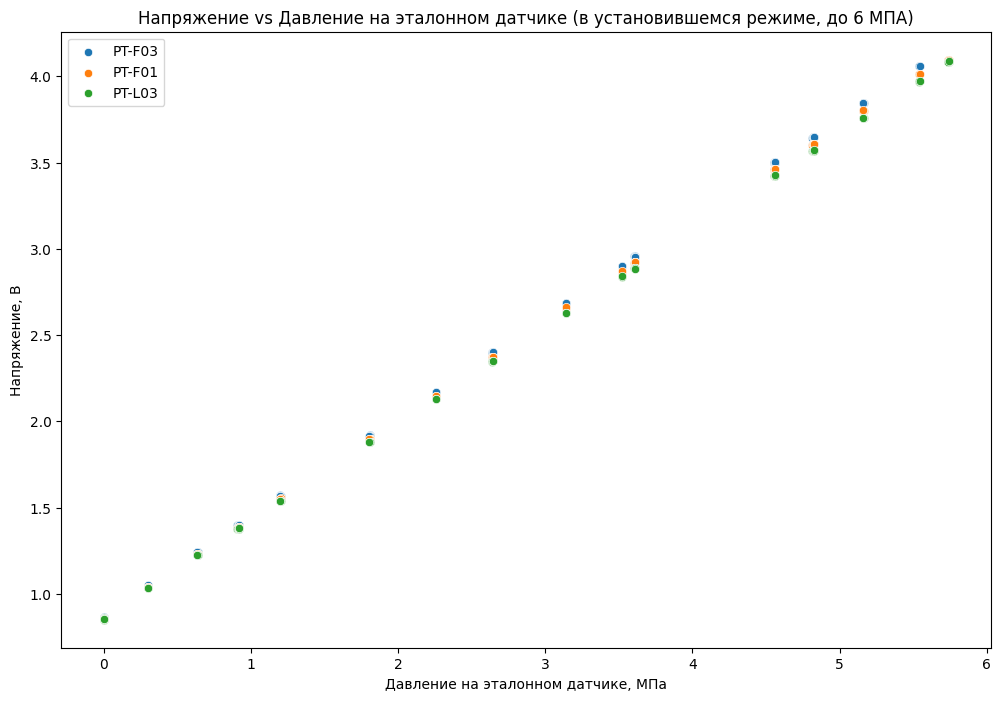

In [22]:
# Построение графиков
plt.figure(figsize=(12, 8))
sns.scatterplot(data=stable_data_filtered, x='reference_M_Pa', y='PT-F03_2_1_V', label='PT-F03')
sns.scatterplot(data=stable_data_filtered, x='reference_M_Pa', y='PT-F01_2_2_V', label='PT-F01')
sns.scatterplot(data=stable_data_filtered, x='reference_M_Pa', y='PT-L03_2_3_V', label='PT-L03')
plt.xlabel('Давление на эталонном датчике, МПа')
plt.ylabel('Напряжение, В')
plt.title('Напряжение vs Давление на эталонном датчике (в установившемся режиме, до 6 МПА)')
plt.legend()
plt.savefig(f'./results/fig/exp_data_stable_data_limit.png')
plt.show()

In [23]:
def plot_regression_with_error(sensor_voltage, sensor_name):
    # Подготовка данных
    x = stable_data_filtered[sensor_voltage].values.reshape(-1, 1)
    y = stable_data_filtered['reference_M_Pa'].values

    # Создание и обучение модели линейной регрессии
    model = LinearRegression()
    model.fit(x, y)

    # Получение коэффициентов регрессии
    coef = model.coef_[0]
    intercept = model.intercept_

    # Предсказанные значения
    y_pred = model.predict(x)

    # Вычисление коэффициента детерминации R^2 и средней квадратичной ошибки
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Вычисление средней относительной ошибки
    relative_errors = np.abs((y - y_pred) / y) * 100
    mean_relative_error = np.mean(relative_errors)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Данные измерений')
    plt.plot(x, y_pred, color='red', label=f'Линия регрессии: y = {coef:.4f}x + {intercept:.4f}')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Давление на эталонном датчике, МПа')
    plt.title(f'Линия регрессии. {sensor_name}\n$R^2 = {r2:.4f}$, MSE = {mse:.4f}, MRE = {mean_relative_error:.2f}%')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'./results/fig/regression_{sensor_name}.png')
    plt.show()
    print(f'{sensor_name} y = {coef}x + {intercept}')

    # Построение графика остатков
    residuals = y - y_pred
    plt.figure(figsize=(10, 4))
    plt.scatter(x, residuals, color='purple')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Остатки, МПа')
    plt.title(f'График остатков. {sensor_name}')
    plt.grid(True)
    plt.savefig(f'./results/fig/residuals_{sensor_name}.png')
    plt.show()


/tmp/ipykernel_340008/3079792701.py:22: RuntimeWarning: divide by zero encountered in divide
  relative_errors = np.abs((y - y_pred) / y) * 100


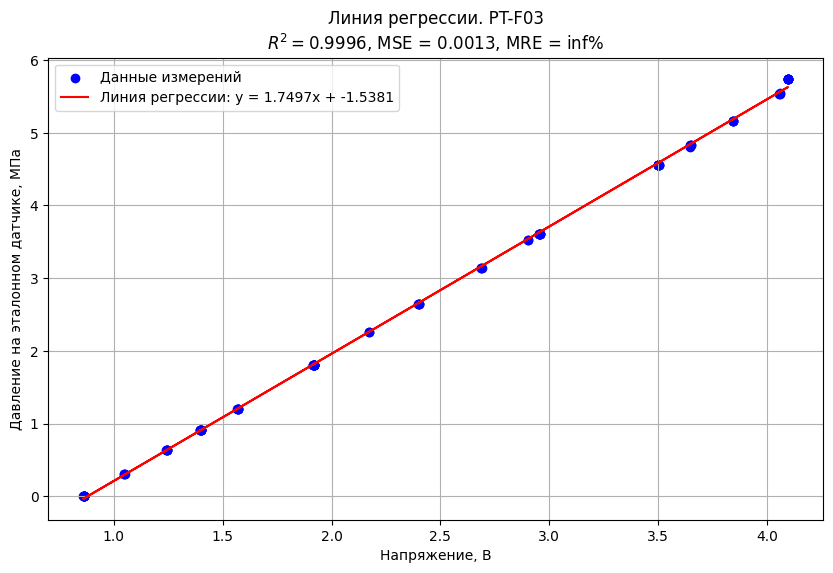

PT-F03 y = 1.7496909490897918x + -1.53809275223405


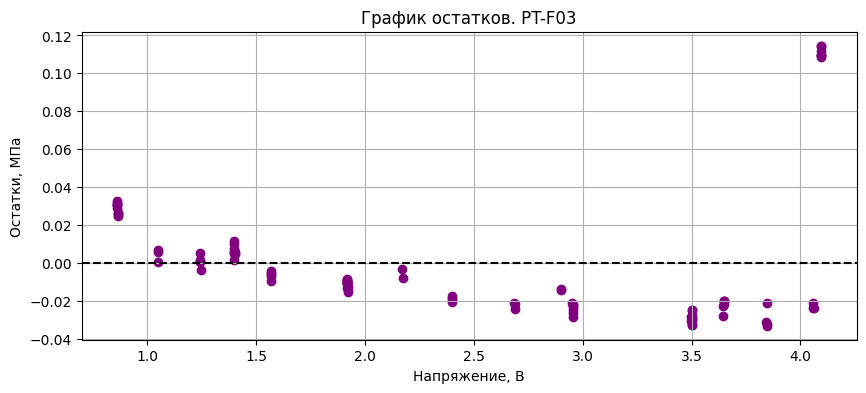

/tmp/ipykernel_340008/3079792701.py:22: RuntimeWarning: divide by zero encountered in divide
  relative_errors = np.abs((y - y_pred) / y) * 100


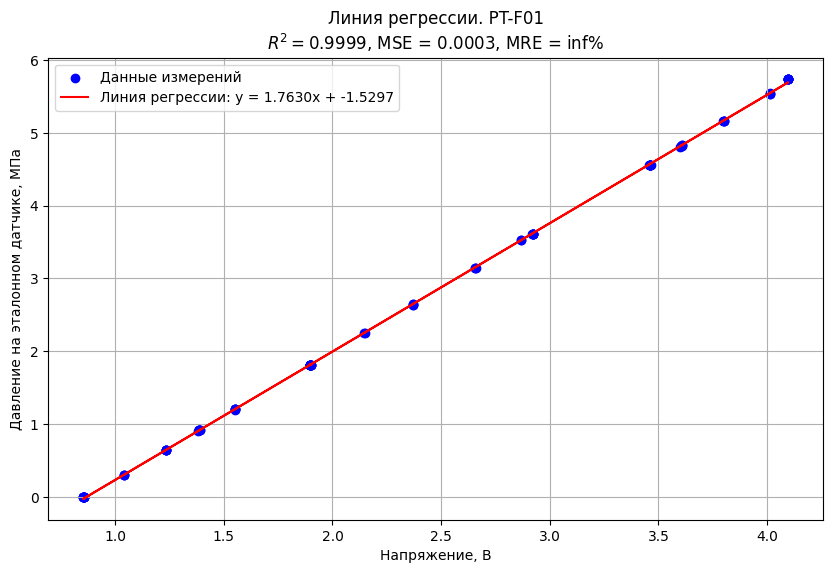

PT-F01 y = 1.7629771714297195x + -1.5297189064116772


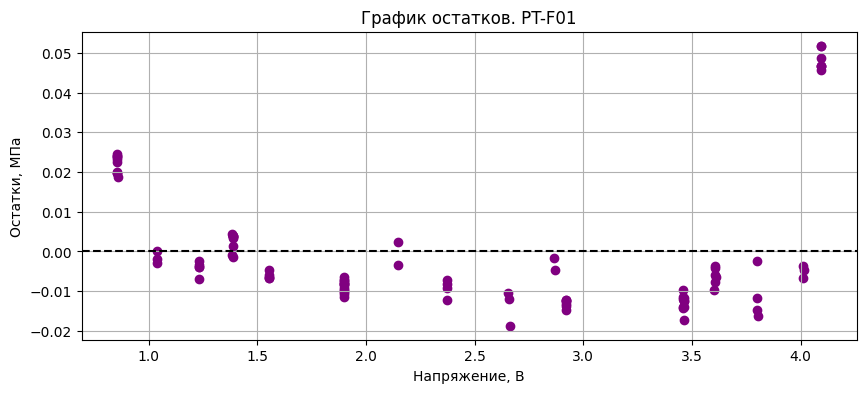

/tmp/ipykernel_340008/3079792701.py:22: RuntimeWarning: divide by zero encountered in divide
  relative_errors = np.abs((y - y_pred) / y) * 100


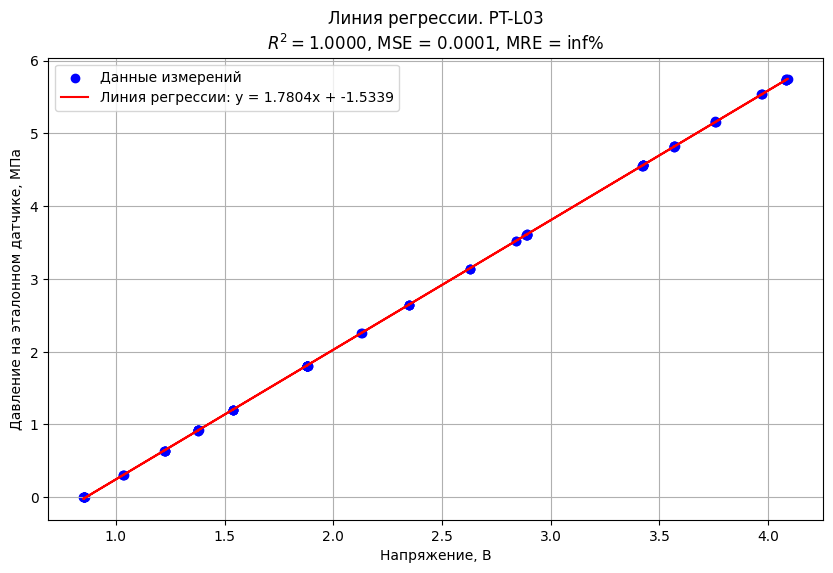

PT-L03 y = 1.7803659492333992x + -1.5338832123711423


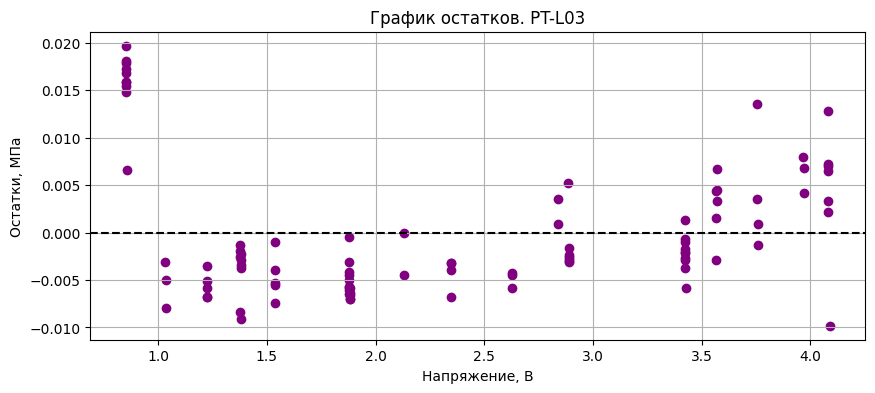

In [24]:
# Построение графиков для каждого датчика
plot_regression_with_error('PT-F03_2_1_V', 'PT-F03')
plot_regression_with_error('PT-F01_2_2_V', 'PT-F01')
plot_regression_with_error('PT-L03_2_3_V', 'PT-L03')

Коэффициенты детерминации 0.9996, 0.9999 и 1, указывают на то, что модель линейной регрессии очень хорошо объясняет вариацию данных. Это означает, что существует сильная линейная зависимость между напряжением на датчиках и эталонным давлением в МПа.